In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(sns.load_dataset('iris'))


df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
sepal_length = df['sepal_length']

# Measures of Central Tendency
mean = np.mean(sepal_length)
median = np.median(sepal_length)
mode = sepal_length.mode()[0]  # Mode(s) can be multiple; taking the first

# Measures of Dispersion
variance = np.var(sepal_length, ddof=0)  # Population variance
sample_variance = np.var(sepal_length, ddof=1)  # Sample variance (unbiased)
std_dev = np.std(sepal_length, ddof=0)  # Population SD
sample_std_dev = np.std(sepal_length, ddof=1)  # Sample SD
data_range = np.max(sepal_length) - np.min(sepal_length)

# IQR (Interquartile Range)
Q1 = np.percentile(sepal_length, 25)
Q3 = np.percentile(sepal_length, 75)
IQR = Q3 - Q1

print(f"""
Mean: {mean:.2f}
Median: {median:.2f}
Mode: {mode:.2f}
Population Variance: {variance:.2f}
Sample Variance: {sample_variance:.2f}
Population Std Dev: {std_dev:.2f}
Sample Std Dev: {sample_std_dev:.2f}
Range: {data_range:.2f}
IQR: {IQR:.2f}
""")


Mean: 5.84
Median: 5.80
Mode: 5.00
Population Variance: 0.68
Sample Variance: 0.69
Population Std Dev: 0.83
Sample Std Dev: 0.83
Range: 3.60
IQR: 1.30



In [20]:
weights = np.where(df['species'] == 'setosa', 0.5, 1.0)  # Higher weight for non-setosa
weighted_mean = np.average(sepal_length, weights=weights)
print(f"Weighted Mean: {weighted_mean:.2f}")

Weighted Mean: 6.01


In [21]:
from scipy.stats import trim_mean
trimmed_mean = trim_mean(sepal_length, proportiontocut=0.1)
print(f"Trimmed Mean (10%): {trimmed_mean:.2f}")

Trimmed Mean (10%): 5.81


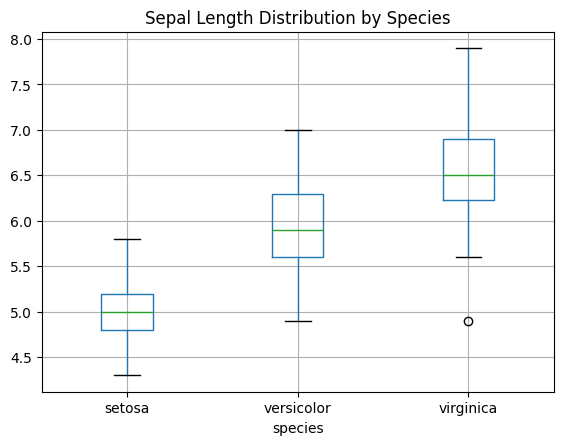

In [28]:
plt.Figure(figsize=(10, 6))
df.boxplot(column='sepal_length', by='species')
plt.title('Sepal Length Distribution by Species')
plt.suptitle('')
plt.show()

In [25]:
cov_matrix = df.iloc[:, :4].cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [26]:
corr_matrix = df.iloc[:, :4].corr()
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


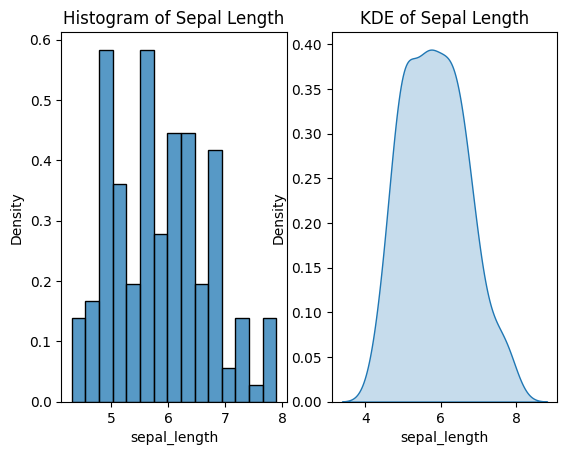

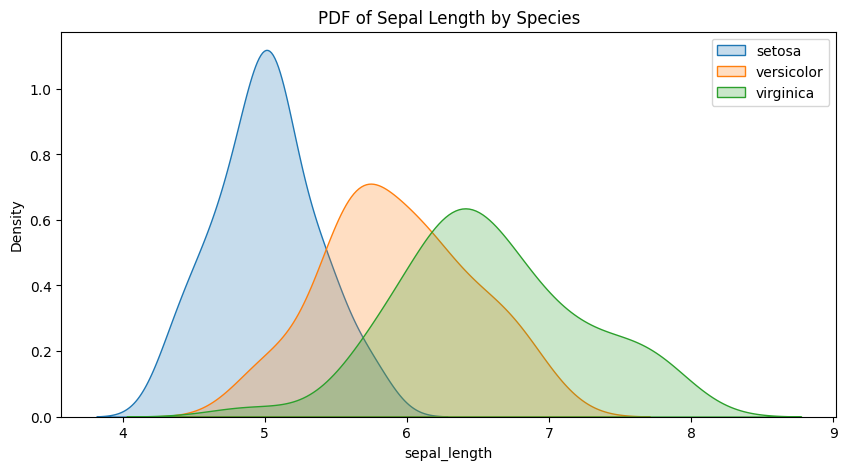

In [46]:
plt.Figure(figsize=(12,12))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='sepal_length', kde=False, stat='density', bins=15)
plt.title('Histogram of Sepal Length')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='sepal_length', fill=True)
plt.title('KDE of Sepal Length')

# Compare species PDFs
plt.figure(figsize=(10, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    sns.kdeplot(data=subset, x='sepal_length', label=species, fill=True)
plt.title('PDF of Sepal Length by Species')
plt.legend()
plt.show()

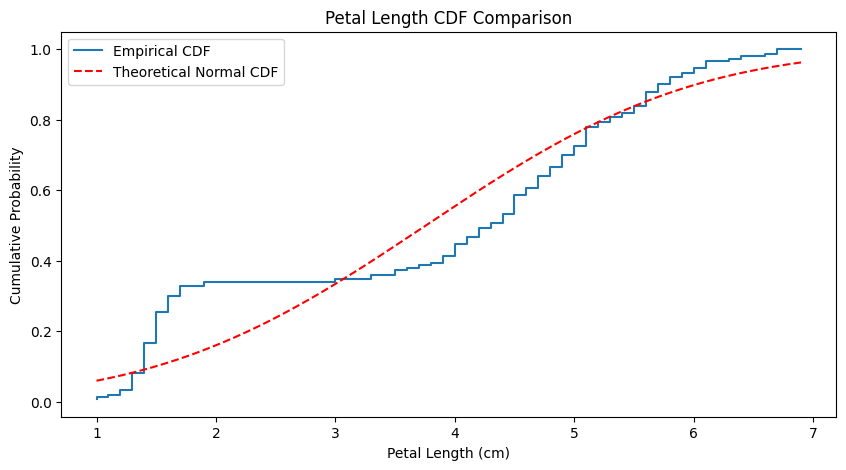

In [48]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, gaussian_kde
# Create ECDF for petal length
petal_length = df['petal_length']
ecdf = ECDF(petal_length)

# Theoretical normal CDF (assuming normal distribution)
mu, sigma = petal_length.mean(), petal_length.std()
x = np.linspace(petal_length.min(), petal_length.max(), 1000)
theoretical_cdf = norm.cdf(x, mu, sigma)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')
plt.plot(x, theoretical_cdf, 'r--', label='Theoretical Normal CDF')
plt.title('Petal Length CDF Comparison')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

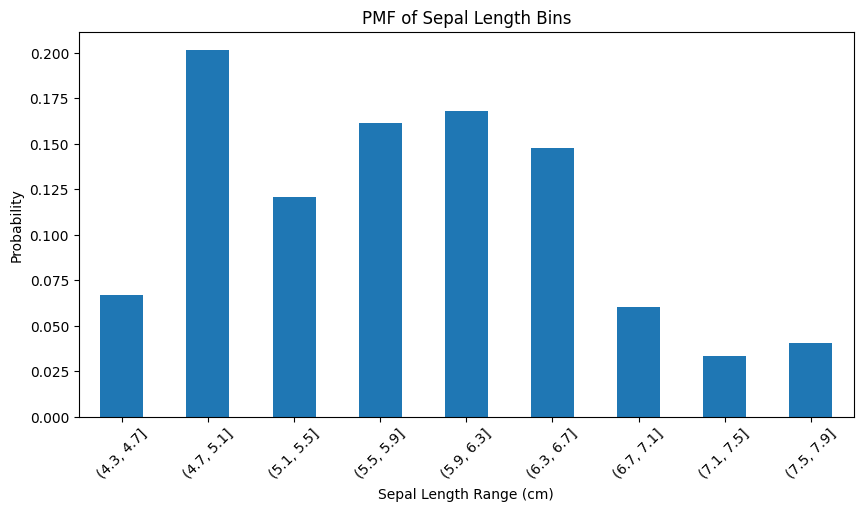

In [50]:
# Create a discrete example - count of flowers by sepal length bins
bins = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), 10)
df['sepal_bin'] = pd.cut(df['sepal_length'], bins=bins)
counts = df['sepal_bin'].value_counts().sort_index()

# Calculate PMF
pmf = counts / counts.sum()

# Plot PMF
plt.figure(figsize=(10, 5))
pmf.plot(kind='bar')
plt.title('PMF of Sepal Length Bins')
plt.xlabel('Sepal Length Range (cm)')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()